$\Large{\text{Clustering using K-Means}}$ 

Given data set $D=\{(x^i\}_{i=1}^{m}$ of points $x^i$, we wish to cluster these points into groups. The clustering should be done in such a way that the points belonging to the same group (or) cluster should be similar when compared to the points from other groups (or) clusters. 


Given the number of clusters $K$, the clustering is achieved by finding a partition $(C_1,C_2,\ldots,C_K) \subseteq D^K$, such that the following objective is optimized:

$
\begin{align}
\min_{(C_1,C_2,\ldots,C_K) \subseteq D^K} \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\frac{1}{|C_k|}\sum_{u \in C_k} u\|
\end{align}
$

This optimization algorithm can be equivalenty written as:
$
\begin{align}
\min_{(C_1,C_2,\ldots,C_K) \subseteq D^K} \sum_{k=1}^{K} \sum_{x \in C_k} \|x-\mu^k\|
\end{align}
$
where $\mu^k = \frac{1}{|C_k|}\sum_{u \in C_k} u$. 

In general, solving this optimization problem is NP-hard. However an iterative technique called $K$-Means algorithm has been developed which can effectively cluster the points by finding a local optimum of the above optimization problem. 

The idea of the algorithm is as follows: 

*   Input: Data set $D=\{(x^i)\}_{i=1}^{m}$. 
*   Start with a random initialization of means $(\mu^1,\mu^2,\ldots,\mu^K)$ (usually identified from the data set itself).
*   Repeat:
      1. Construct partitions $(C_1,C_2,\ldots,C_K)$ such that $C_j$ contains points from $D$ which are closer to $\mu^j, \forall j\in\{1,2\ldots,K\}$.
      2. Recompute means $\mu^j = \frac{1}{|C_j|} \sum_{x \in C_j} x, \forall j\in \{1,2,\ldots,K}$. 

    Until partitions $(C_1,C_2,\ldots,C_K)$ do not change.




In [ ]:
#importing the required packages
import pandas as pd
import numpy as np

In [ ]:
#Please copy the 's1.txt' file to the current folder in colab
#read the txt file into a data frame
df= pd.read_csv('s1.txt', sep='    ',index_col=None,header = None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,0,1
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5000 non-null   int64
 1   1       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


In [ ]:
#plot the number of rows and columns in df
print('shape of data:(', len(df.index), len(df.columns),')')

shape of data:( 5000 2 )


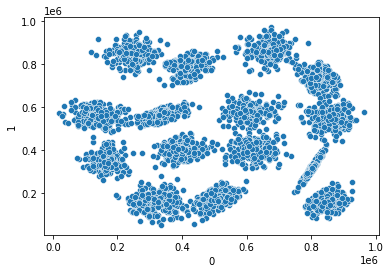

In [ ]:
#since the data is 2D, let us do a scatter plot
import seaborn as sns
sns.scatterplot(x=df[0],y=df[1])

In [ ]:
#Let us try to do a clustering of the given data using K-Means algorithm
#import K-Means library from scikit learn
from sklearn.cluster import KMeans

In [ ]:
#first let us convert the dataframe to a nupy array since K-Means library from scikit learn accepts numpy arrays only
X = df.to_numpy() 

In [ ]:
#print the size of data
print('shape of data:', X.shape)

shape of data: (5000, 2)


In [ ]:
#check the contents of X 
X

array([[664159, 550946],
       [665845, 557965],
       [597173, 575538],
       ...,
       [650661, 861267],
       [599647, 858702],
       [684091, 842566]])

In [ ]:
km = KMeans(n_clusters=5, random_state=0)

In [ ]:
#let us try to see what is available in km
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
km_result = km.fit(X)

In [ ]:
km_result.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
print(X[:,0].shape, X[:,1].shape, km_result.labels_.shape)

(5000,) (5000,) (5000,)


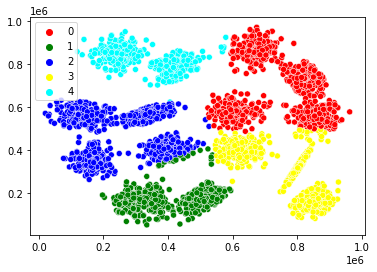

In [ ]:
 sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_result.labels_, palette=['red','green','blue','yellow','cyan'])

In [ ]:
#what are the centers of the clusters?
km_result.cluster_centers_

array([[742481.33617351, 684525.73121611],
       [416482.98044693, 175519.96787709],
       [259047.72890217, 469522.58028379],
       [758509.36958711, 296336.26586102],
       [329618.53403933, 818757.64145234]])

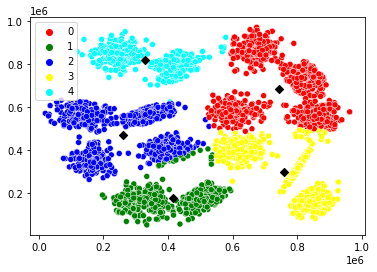

In [ ]:
#plot these centers in the cluster plot
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_result.labels_, palette=['red','green','blue','yellow','cyan'])
plt.scatter(x=km_result.cluster_centers_[:,0],y=km_result.cluster_centers_[:,1],color='black',marker="D", s=34)


In [ ]:
#Suppose we have some new points which need to be identified with the clusters, then we can predict the cluster number as below
new_points = np.array([[540118, 671072], [507453, 777031], [569266, 738385], [444587, 878830], [434041, 814466]])
km_result.predict(new_points)

array([0, 4, 0, 4, 4], dtype=int32)

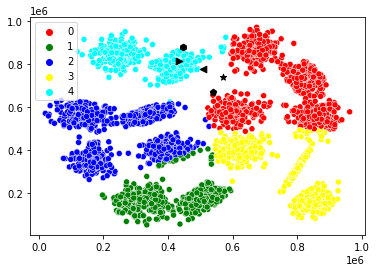

In [ ]:
#plot these predictions for the new points in the cluster plot
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_result.labels_, palette=['red','green','blue','yellow','cyan'])

markers=["p","<","*","h",">"]
for j in range(len(new_points)):
  plt.scatter(x=new_points[j,0],y=new_points[j,1],color='black',marker=markers[j], s=44)


In [ ]:
#Exercise 1
#Try to understand the K-Means++ algorithm implemented in scikit learn package. 
#[R]For the data in S1.txt, vary the number of clusters K by choosing from the set {6,7,8,9,10,11,12,13} and use the data in the KMeans function of scikit learn package. 
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters. 
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 6 till 13. 
#[R}Consider the test.txt given in moodle and find the predictions for the points in test.txt for clustering obtained for each value of K. Plot the points in the scatter plot and indicate the predicted cluster labels.
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Can you suggest your procedure which can be used to find the best choice for the number of clusters? 
#[R]Implement your procedure for the data from S1.txt and report the best choice for the number of clusters. 

#[R]Explain how you can modify the data in S1.txt so that the mean of each column is 0 and variance is 1. This procedure is called column normalization.
#[R]Write the appropriate code to do the column normalization. 
#[R]On the new data set thus obtained where the columns have mean 0 and variance 1, repeat the clustering for K in {5,6,7,8,9,10,11,12,13}.
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters. 
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 5 till 13.
#[R]Explain how you will modify the test data given in test.txt file so that it can be used for prediction? Using your idea, convert the data in test.txt so that it can be used for prediction and report the predicted labels. Prepare scatter plots where you plot the transformed data from test.txt. 
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Using your procedure to find the best choice of number of clusters, report the best choice for the number of clusters for the column normalized data. 
#[R]Did you observe any differences when the data from S1.txt was used without normalization and with normalization?  Explain. 
#[R]Did you observe any differences during prediction when the data from S1.txt was used for clustering without normalization and with normalization?  Explain. 
#[R]Explain a situtation where normalizing the data might help. 



In [ ]:
#Exercise 2
#Answer the following questions for the other data sets from b4.txt, e3.txt, u1.txt files posted in moodle.

#[R]Vary the number of clusters K by choosing from the set {3,5,7,9,11,13,15,17,19} and use the data in the KMeans function of scikit learn package. 
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters. 
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 3 till 19. 
#[R}Consider the test.txt given in moodle and find the predictions for the points in test.txt for clustering obtained for each value of K. Plot the points in the scatter plot and indicate the predicted cluster labels.
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Using your procedure to find the best choice of number of clusters derived in Exercise 1, report the best choice for the number of clusters for the column normalized data. 


#Normalize the columns of the data to be of mean 0 and variance 1.
#[R]On the new data set thus obtained where the columns have mean 0 and variance 1, repeat the clustering for K in {3,5,7,9,11,13,15,17,19}.
#[R]For each value of K, prepare the scatter plots depicting the clusters using different colors along with the cluster centers depicted in the same plot with a color different from those used for clusters. 
#[R]Explain your observations about the clustering results you obtained when the value of K is increased from 3 till 19.
#[R]Modify the test data given in test.txt file so that it can be used for prediction and report the predicted labels. Prepare scatter plots where you plot the transformed data from test.txt. 
#[R]Explain your observations about the predictions obtained for different values of K.
#[R]Using your procedure to find the best choice of number of clusters, report the best choice for the number of clusters for the column normalized data. 
#[R]Did you observe any differences when the data was used without normalization and with normalization?  Explain. 
#[R]Did you observe any differences during prediction when the data was used for clustering without normalization and with normalization?  Explain. 


In [ ]:
#Exercise 3
#Consider the data set from f8.txt
#Perform K-Means clsutering on the data from f8.txt using scikit learn package.
#[R]Explain how you will visualize the clusters for the data from f8.txt?
#[R]Design and illustrate a suitable idea for visualizing the clusters obtained for data from f8.txt. Implement your idea and prepare the required plots to visualize the clusters.
#[R]Plot the cluster centers in the plots thus prepared.

#Ans 2 :

In [ ]:
km_6 = KMeans(n_clusters=6, random_state=0)

In [ ]:
km_6

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
km_6_result = km_6.fit(X)

In [ ]:
km_6_result.labels_

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [ ]:
km_7 = KMeans(n_clusters=7, random_state=0)
km_7_result = km_7.fit(X)

In [ ]:
km_7_result.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
km_8 = KMeans(n_clusters=8, random_state=0)
km_8_result = km_8.fit(X)

In [ ]:
km_8_result.labels_

array([6, 6, 6, ..., 5, 5, 5], dtype=int32)

In [ ]:
km_9 = KMeans(n_clusters=9, random_state=0)
km_9_result = km_9.fit(X)

In [ ]:
km_9_result.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
km_10 = KMeans(n_clusters=10, random_state=0)
km_10_result = km_10.fit(X)

In [ ]:
km_10_result.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
km_11 = KMeans(n_clusters=11, random_state=0)
km_11_result = km_11.fit(X)

In [ ]:
km_11_result.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
km_12 = KMeans(n_clusters=12, random_state=0)
km_12_result = km_12.fit(X)

In [ ]:
km_12_result.labels_

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
km_13 = KMeans(n_clusters=13, random_state=0)
km_13_result = km_13.fit(X)

In [ ]:
km_13_result.labels_

array([3, 3, 3, ..., 6, 6, 6], dtype=int32)

#Ans 3 :

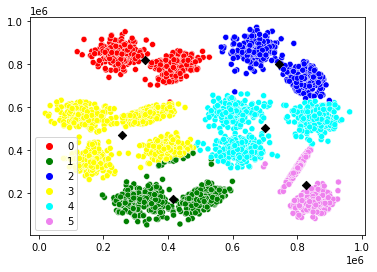

In [ ]:
#plot for K = 6
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_6_result.labels_, palette=['red','green','blue','yellow','cyan','violet'])
plt.scatter(x=km_6_result.cluster_centers_[:,0],y=km_6_result.cluster_centers_[:,1],color='black',marker="D", s=34)

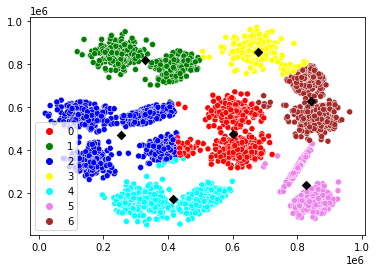

In [ ]:
#plot for K = 7
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_7_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown'])
plt.scatter(x=km_7_result.cluster_centers_[:,0],y=km_7_result.cluster_centers_[:,1],color='black',marker="D", s=34)

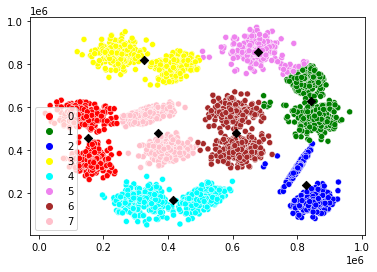

In [ ]:
#plot for K = 8
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_8_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink'])
plt.scatter(x=km_8_result.cluster_centers_[:,0],y=km_8_result.cluster_centers_[:,1],color='black',marker="D", s=34)

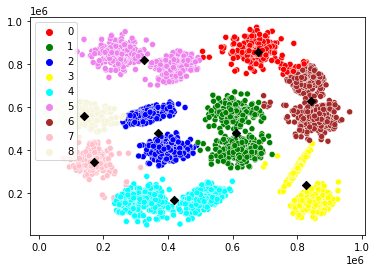

In [ ]:
#plot for K = 9
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_9_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige'])

plt.scatter(x=km_9_result.cluster_centers_[:,0],y=km_9_result.cluster_centers_[:,1],color='black',marker="D", s=34)

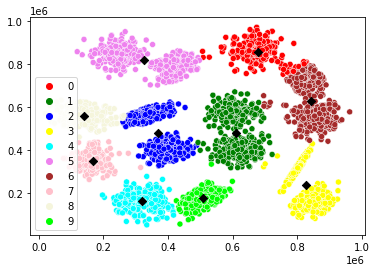

In [ ]:
#plot for K = 10
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_10_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime'])
plt.scatter(x=km_10_result.cluster_centers_[:,0],y=km_10_result.cluster_centers_[:,1],color='black',marker="D", s=34)

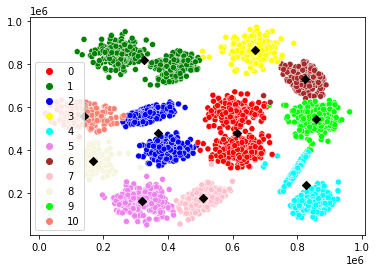

In [ ]:
#plot for K = 11
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_11_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon'])
plt.scatter(x=km_11_result.cluster_centers_[:,0],y=km_11_result.cluster_centers_[:,1],color='black',marker="D", s=34)

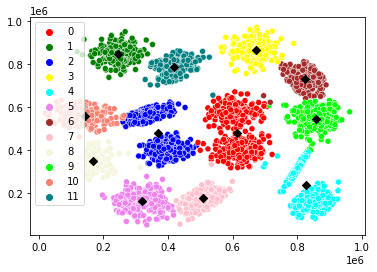

In [ ]:
#plot for K = 12
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_12_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal'])
plt.scatter(x=km_12_result.cluster_centers_[:,0],y=km_12_result.cluster_centers_[:,1],color='black',marker="D", s=34)

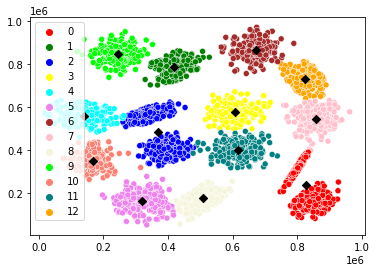

In [ ]:
#plot for K = 13
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_13_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal','orange'])
plt.scatter(x=km_13_result.cluster_centers_[:,0],y=km_13_result.cluster_centers_[:,1],color='black',marker="D", s=34)

#Ans 4 :

As value of K is increased from 6 to 13, we observe that new clusters are formed by separating old clusters in each new value of K.

We also see that as the value of K increases, the sum of distances between cluster points and cluster center decreases.

In [ ]:
new_points_test = np.loadtxt('test.txt')

In [ ]:
print(new_points_test)

[[175569. 306397.]
 [ 89722. 122964.]
 [699907. 596579.]
 [800441. 630292.]
 [302293. 467398.]
 [211558. 285224.]
 [610774. 300142.]
 [850360. 467513.]]


#Ans 5 : 
Predictions along with the scatterplot are given below for each value of K

In [ ]:
km_6_result.predict(new_points_test)

array([3, 1, 4, 4, 3, 3, 4, 4], dtype=int32)

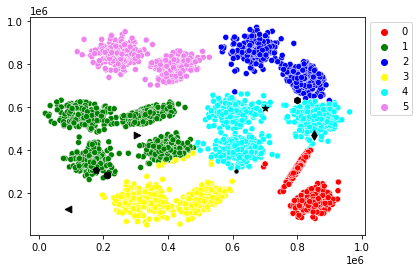

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_6_result.labels_, palette=['red','green','blue','yellow','cyan','violet'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


In [ ]:
km_7_result.predict(new_points_test)

array([2, 4, 6, 6, 2, 2, 0, 6], dtype=int32)

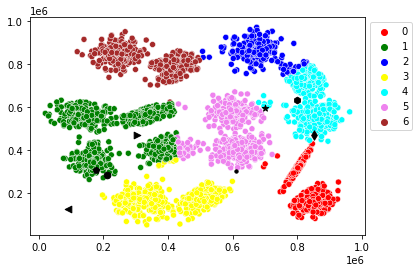

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_7_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


In [ ]:
km_8_result.predict(new_points_test)

array([0, 4, 1, 1, 7, 0, 6, 1], dtype=int32)

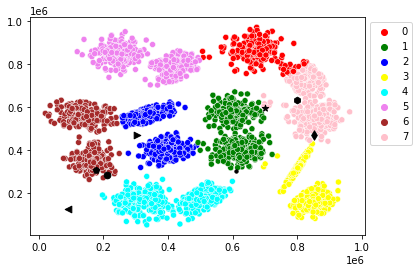

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_8_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


In [ ]:
km_9_result.predict(new_points_test)

array([7, 7, 1, 6, 2, 7, 1, 6], dtype=int32)

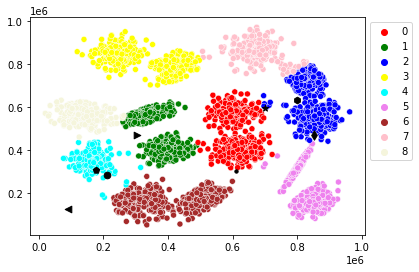

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_9_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


In [ ]:
km_10_result.predict(new_points_test)

array([7, 4, 1, 6, 2, 7, 9, 6], dtype=int32)

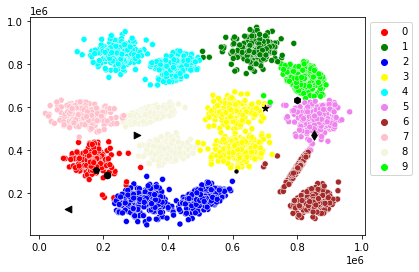

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_10_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


In [ ]:
km_11_result.predict(new_points_test)

array([8, 5, 0, 6, 2, 8, 7, 9], dtype=int32)

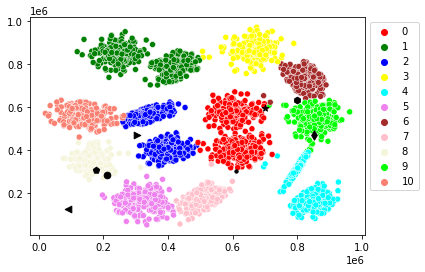

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_11_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


In [ ]:
km_12_result.predict(new_points_test)

array([8, 5, 0, 6, 2, 8, 7, 9], dtype=int32)

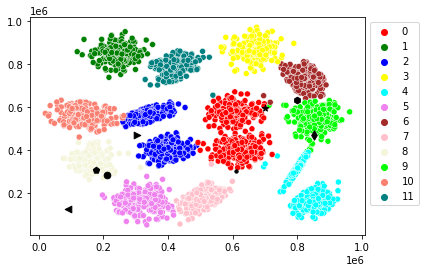

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_12_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


In [ ]:
km_13_result.predict(new_points_test)

array([10,  5,  3, 12,  2, 10, 11,  7], dtype=int32)

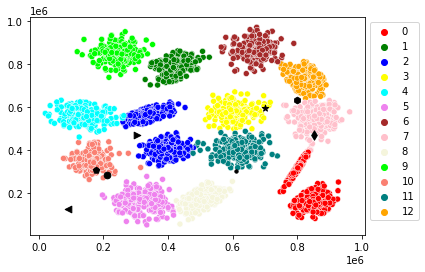

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=km_13_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal','orange'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_test)):
  plt.scatter(x=new_points_test[j,0],y=new_points_test[j,1],color='black',marker=markers[j], s=44)


#Ans 6 :

We observe that for different values of K, the predictions for the points change.

We see that when the value of K is less, 2 or 3 points fall in the same cluster, but as value of K increases, we rarely see this trend.

#Ans 7 :

To find the best choice for the number of clusters, we can plot a graph of values of K against the sum of squares of distace between each data point and its centroid. We can calculate this for each value of K by the method inertia of KMeans.

By observing the graph, we can then decide a point where the value of inertia as well as the value of K both are low.


#Ans 8 :

We can look at the graph obtained by the above procedure, and see that the best choice for the number of clusters would be 9.

In [ ]:
sse = {6:km_6_result.inertia_,7:km_7_result.inertia_,8:km_8_result.inertia_,9:km_9_result.inertia_,10:km_10_result.inertia_,11:km_11_result.inertia_,12:km_12_result.inertia_,13:km_13_result.inertia_}

In [ ]:
print(sse)

{6: 79769015011631.83, 7: 63576782879521.75, 8: 48146924629521.44, 9: 40427788407269.08, 10: 34391852568021.793, 11: 28620400449770.418, 12: 23146715973814.33, 13: 18272499282576.812}


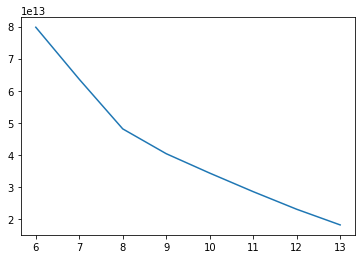

In [ ]:
plt.plot(list(sse.keys()),list(sse.values()))

#Ans 10 :

The code below performs column normalization.
We first make a new copy of the dataframe. Then, initialize variables for the mean and standard deviation of each column of the dataframe. Then, we apply the z score formula for each value in each column, thus, normalizing the columns.

In [ ]:
df_norm = df.copy()

In [ ]:
m_0 = np.mean(df_norm[0])
m_1 = np.mean(df_norm[1])
s_0 = np.std(df_norm[0])
s_1 = np.std(df_norm[1])

In [ ]:
df_norm[0] = (df_norm[0] - m_0) / s_0
df_norm[1] = (df_norm[1] - m_1) / s_1

In [ ]:
X_norm = df_norm.to_numpy()

#Ans 11 :
Below is the code for clustering for the normalized columns for each value of K

In [ ]:
km_5_norm_result = km.fit(X_norm)
km_5_norm_result.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
km_6_norm_result = km_6.fit(X_norm)
km_6_norm_result.labels_

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [ ]:
km_7_norm_result = km_7.fit(X_norm)
km_7_norm_result.labels_

array([5, 5, 5, ..., 2, 2, 2], dtype=int32)

In [ ]:
km_8_norm_result = km_8.fit(X_norm)
km_8_norm_result.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
km_9_norm_result = km_9.fit(X_norm)
km_9_norm_result.labels_

array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [ ]:
km_10_norm_result = km_10.fit(X_norm)
km_10_norm_result.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
km_11_norm_result = km_11.fit(X_norm)
km_11_norm_result.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
km_12_norm_result = km_12.fit(X_norm)
km_12_norm_result.labels_

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
km_13_norm_result = km_13.fit(X_norm)
km_13_norm_result.labels_

array([3, 3, 3, ..., 6, 6, 6], dtype=int32)

#Ans 12 :


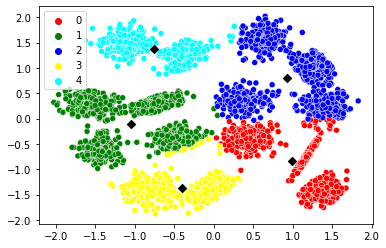

In [ ]:
#plot for k = 5
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_5_norm_result.labels_, palette=['red','green','blue','yellow','cyan'])
plt.scatter(x=km_5_norm_result.cluster_centers_[:,0],y=km_5_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

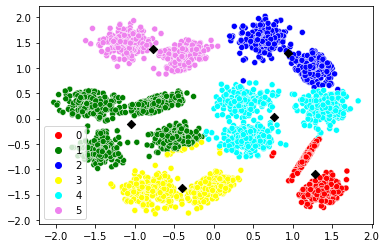

In [ ]:
#plot for k = 6
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_6_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet'])
plt.scatter(x=km_6_norm_result.cluster_centers_[:,0],y=km_6_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

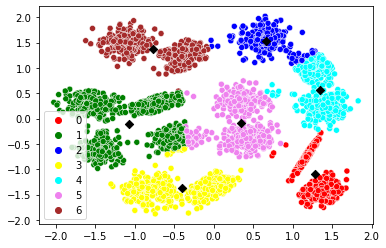

In [ ]:
#plot for k = 7
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_7_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown'])
plt.scatter(x=km_7_norm_result.cluster_centers_[:,0],y=km_7_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

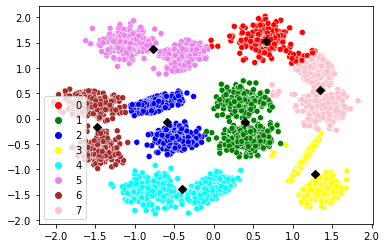

In [ ]:
#plot for k = 8
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_8_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink'])
plt.scatter(x=km_8_norm_result.cluster_centers_[:,0],y=km_8_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

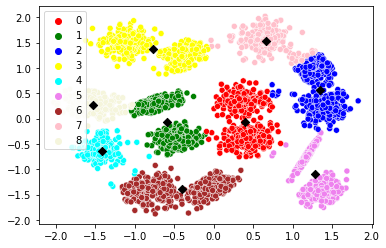

In [ ]:
#plot for k = 9
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_9_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige'])
plt.scatter(x=km_9_norm_result.cluster_centers_[:,0],y=km_9_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

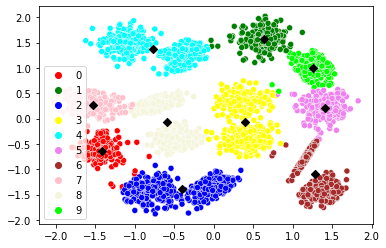

In [ ]:
#plot for k = 10
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_10_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime'])
plt.scatter(x=km_10_norm_result.cluster_centers_[:,0],y=km_10_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

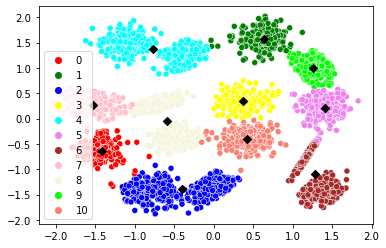

In [ ]:
#plot for k = 11
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_11_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon'])
plt.scatter(x=km_11_norm_result.cluster_centers_[:,0],y=km_11_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

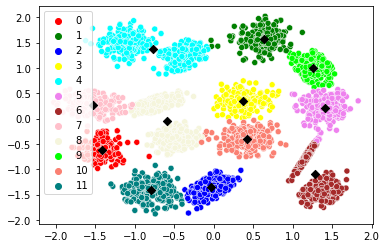

In [ ]:
#plot for k = 12
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_12_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal'])
plt.scatter(x=km_12_norm_result.cluster_centers_[:,0],y=km_12_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

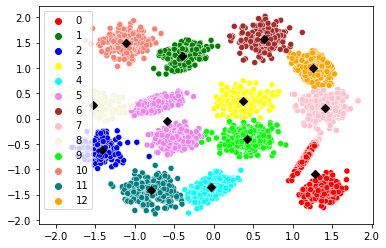

In [ ]:
#plot for k = 13
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_13_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal','orange'])
plt.scatter(x=km_13_norm_result.cluster_centers_[:,0],y=km_13_norm_result.cluster_centers_[:,1],color='black',marker="D", s=34)

#Ans 13 :

As value of K is increased from 5 to 13, we observe that new clusters are formed by separating old clusters in each new value of K.

We also see that as the value of K increases, the sum of distances between cluster points and cluster center decreases.

#Ans 14 :

To use the data in test.txt for prediction in the above model, we need to normalize the data in the same way we normalized the columns.

We do the same in the code below.

The labels for predicted data for K = 5 : [1, 3, 2, 2, 1, 1, 0, 2]

The labels for predicted data for K = 6 : [1, 3, 2, 2, 1, 1, 4, 4]

The labels for predicted data for K = 7 : [1, 3, 2, 2, 1, 1, 5, 4]

The labels for predicted data for K = 8 : [6, 4, 0, 0, 2, 2, 1, 7]

The labels for predicted data for K = 9 : [4, 6, 7, 7, 1, 4, 0, 2]

The labels for predicted data for K = 10 : [0, 2, 1, 9, 8, 0, 3, 5]

The labels for predicted data for K = 11 : [ 0,  2,  1,  9,  8,  0, 10,  5]

The labels for predicted data for K = 12 : [ 0, 11,  1,  9,  8,  0, 10,  5]

The labels for predicted data for K = 13 : [ 2, 11,  6, 12,  5,  2,  9,  7]


In [ ]:
new_points_norm_test = new_points_test.copy()

In [ ]:
new_points_norm_test[:,0] = (new_points_norm_test[:,0] - new_points_norm_test[:,0].mean()) / new_points_norm_test[:,0].std()
new_points_norm_test[:,1] = (new_points_norm_test[:,1] - new_points_norm_test[:,1].mean()) / new_points_norm_test[:,1].std()

In [ ]:
km_5_norm_result.predict(new_points_norm_test)

array([1, 3, 2, 2, 1, 1, 0, 2], dtype=int32)

In [ ]:
km_6_norm_result.predict(new_points_norm_test)

array([1, 3, 2, 2, 1, 1, 4, 4], dtype=int32)

In [ ]:
km_7_norm_result.predict(new_points_norm_test)

array([1, 3, 2, 2, 1, 1, 5, 4], dtype=int32)

In [ ]:
km_8_norm_result.predict(new_points_norm_test)

array([6, 4, 0, 0, 2, 2, 1, 7], dtype=int32)

In [ ]:
km_9_norm_result.predict(new_points_norm_test)

array([4, 6, 7, 7, 1, 4, 0, 2], dtype=int32)

In [ ]:
km_10_norm_result.predict(new_points_norm_test)

array([0, 2, 1, 9, 8, 0, 3, 5], dtype=int32)

In [ ]:
km_11_norm_result.predict(new_points_norm_test)

array([ 0,  2,  1,  9,  8,  0, 10,  5], dtype=int32)

In [ ]:
km_12_norm_result.predict(new_points_norm_test)

array([ 0, 11,  1,  9,  8,  0, 10,  5], dtype=int32)

In [ ]:
km_13_norm_result.predict(new_points_norm_test)

array([ 2, 11,  6, 12,  5,  2,  9,  7], dtype=int32)

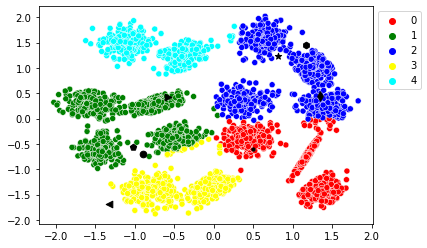

In [ ]:
#K = 5
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_5_norm_result.labels_, palette=['red','green','blue','yellow','cyan'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


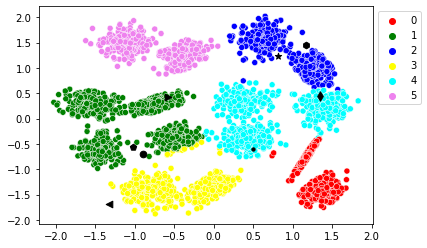

In [ ]:
#K = 6
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_6_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


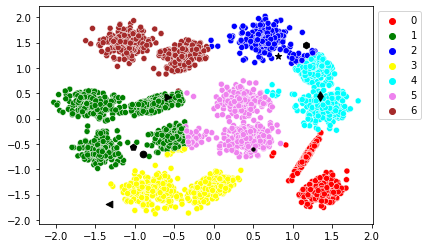

In [ ]:
#K = 7
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_7_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


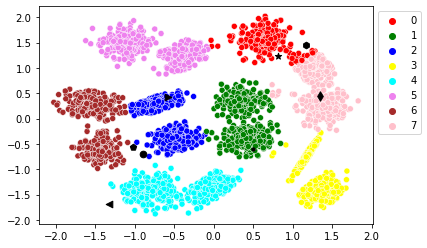

In [ ]:
#K = 8
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_8_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


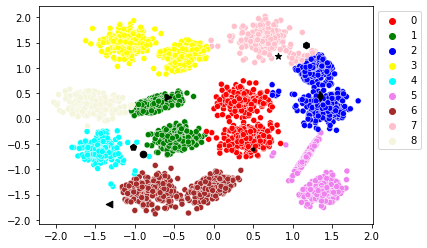

In [ ]:
#K = 9
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_9_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


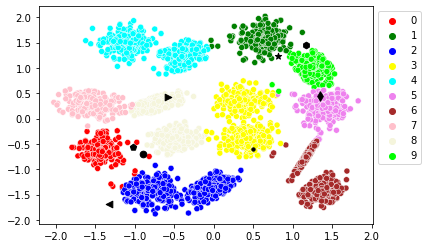

In [ ]:
#K = 10
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_10_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


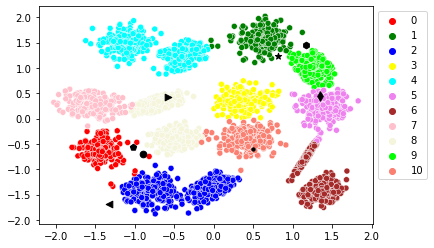

In [ ]:
#K = 11
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_11_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


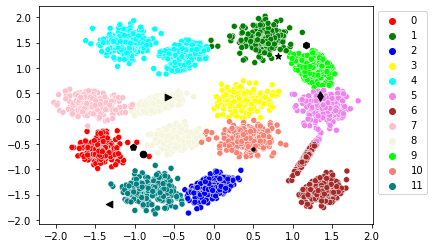

In [ ]:
#K = 12
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_12_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


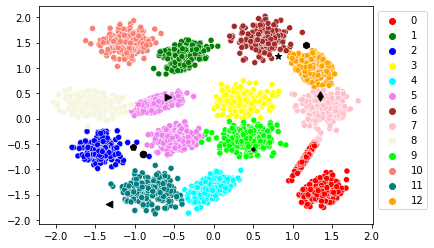

In [ ]:
#K = 13
sns.scatterplot(x=X_norm[:,0],y=X_norm[:,1],hue=km_13_norm_result.labels_, palette=['red','green','blue','yellow','cyan','violet','brown','pink','beige','lime','salmon','teal','orange'])
plt.legend(loc = 'upper left',bbox_to_anchor = (1,1))

markers=["p","<","*","h",">","o",".","d"]
for j in range(len(new_points_norm_test)):
  plt.scatter(x=new_points_norm_test[j,0],y=new_points_norm_test[j,1],color='black',marker=markers[j], s=44)


#Ans 15 :
We observe that for different values of K, the predictions for the points change.

We see that when the value of K is less, 2 or 3 points fall in the same cluster, but as value of K increases, we rarely see this trend.

#Ans 16 :

Using the same method, we can observe that the best no. of clusters is 9.

In [ ]:
sse = {6:km_6_norm_result.inertia_,7:km_7_norm_result.inertia_,8:km_8_norm_result.inertia_,9:km_9_norm_result.inertia_,10:km_10_norm_result.inertia_,11:km_11_norm_result.inertia_,12:km_12_norm_result.inertia_,13:km_13_norm_result.inertia_}

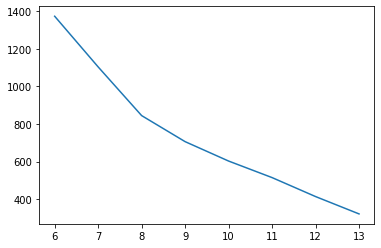

In [ ]:
plt.plot(list(sse.keys()),list(sse.values()))

#Ans 17 :

We don't observe any difference when normalized data was used instead of non-normalized data.

#Ans 18 :

We observe differences in predicted clusters for data in test.txt. The clusters predicted for non-normalized data are different from what predicted for normalized data. 

#Ans 19 :

When units of two different features in our model are different, then in order to see that neither of them influences more than it should, it is a good practice to normalize the data.